### Codio Activity 23.2: Convolutional Neural Network

**Expected Time = 60 minutes**

**Total Points = 40**

This activity focuses on using a basic convolutional architecture to predict the handwritten digits data.  Your goal is to again use the preprocessing tools of `keras` to prepare the data.  Next, you will use the `Conv2D` and `MaxPool2D` layers to create the feature maps of digits.   Finally, you will flatten the resulting feature maps and pass them through a conventional dense architecture.

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import tensorflow as tf

2022-09-17 11:44:49.732409: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-17 11:44:49.732475: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


[Back to top](#-Index)

### Problem 1

#### Loading the Data

**10 Points**

Below, import and load the `mnist` data from `keras`.  Reshape the data in anticipation of the Convolutional Layers -- `(num_observations, 28, 28, 1)`.  Create an `ImageDataGenerator` object `gen` with `rescale = 1/255.`.  Convert the target variable, and use the reshaped and dummied objects with your generator to create both a `train_gen` and `test_gen` objects with the `.flow()` function.

In [2]:
#(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
#x_train
#y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
### GRADED
tf.random.set_seed(42)
(x_train, y_train), (x_test, y_test) = ('', ''), ('', '')
X_train = ''
X_test = ''
gen = ''
Y_train = ''
Y_test = ''
train_gen = ''
test_gen = ''
    
# YOUR CODE HERE
#raise NotImplementedError()

tf.random.set_seed(42)
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# scale data to the range of [0, 1]
X_train = x_train.reshape(60_000, 28, 28, 1)
X_test = x_test.reshape(10_000, 28, 28, 1)

Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

gen = ImageDataGenerator(rescale = 1. / 255.)
train_gen = gen.flow(x=X_train, y=Y_train)
test_gen = gen.flow(x=X_test, y=Y_test)

### ANSWER CHECK
print(train_gen)
print(X_train.shape)
print(Y_train.shape)

(60000, 28, 28, 1)
(60000, 10)


In [10]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

[Back to top](#-Index)

### Problem 2

#### Constructing the Convolutional Layers

**10 Points**

Below, create a network named `conv_model` using the following architecture:

- One `Conv2D` layer with 16 filters size 3 x 3 with `relu` activation
- One `MaxPool2D` layer with pool size 2 x 2
- One `Flatten` layer to flatten the results of pooling
- One `Dense` layer with 100 nodes and `relu` activation
- One `Dense` output layer with `softmax` activation

Compile your model appropriately with `accuracy` as your metric.

In [11]:
### GRADED
tf.random.set_seed(42)
conv_model = ''

    
# YOUR CODE HERE
#raise NotImplementedError()
conv_model = Sequential([
                Conv2D(filters = 16, kernel_size = (3, 3), activation = 'relu'),
                MaxPool2D(pool_size = (2, 2)),
                Flatten(),
                Dense(100, activation = 'relu'),
                Dense(10, activation = 'softmax')
])
conv_model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])

## ANSWER CHECK
conv_model.build(input_shape = (X_train.shape[0], 28, 28, 1))
conv_model.summary()

2022-09-17 12:48:56.033469: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-17 12:48:56.038444: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-17 12:48:56.040882: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (harvestsailor-delivercrown): /proc/driver/nvidia/version does not exist
2022-09-17 12:48:56.080115: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (60000, 26, 26, 16)       160       
                                                                 
 max_pooling2d (MaxPooling2D  (60000, 13, 13, 16)      0         
 )                                                               
                                                                 
 flatten (Flatten)           (60000, 2704)             0         
                                                                 
 dense (Dense)               (60000, 100)              270500    
                                                                 
 dense_1 (Dense)             (60000, 10)               1010      
                                                                 
Total params: 271,670
Trainable params: 271,670
Non-trainable params: 0
__________________________________________________

[Back to top](#-Index)

### Problem 3

#### Examining the Training

**10 Points**

Use the `conv_model` to fit the training data using 20 epochs with `verbose = 0`. Assign the results to `history` and uncomment the code to visualize the resulting fit accuracies.

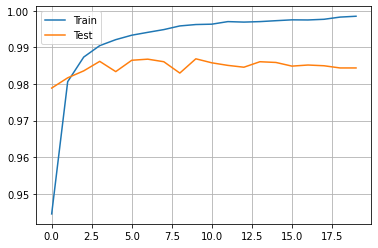

In [12]:
### GRADED
tf.random.set_seed(42)
history = ''

    
# YOUR CODE HERE
#raise NotImplementedError()
history = conv_model.fit(train_gen, validation_data=test_gen, epochs=20, verbose = 0)

### ANSWER CHECK
plt.plot(history.history['accuracy'], label = 'Train')
plt.plot(history.history['val_accuracy'], label = 'Test')
plt.grid()
plt.legend()

[Back to top](#-Index)

### Problem 4

#### Predicting with a New Image

**10 Points**

To predict the value of a given digit use the `.predict` function and reshape the input to `(num_observations, 28, 28, 1)` to make predictions for the first five digits in the test data, given as `test_images` below. 


1/1 [==============================] - 1s 689ms/step
[7 0 1 0 0]


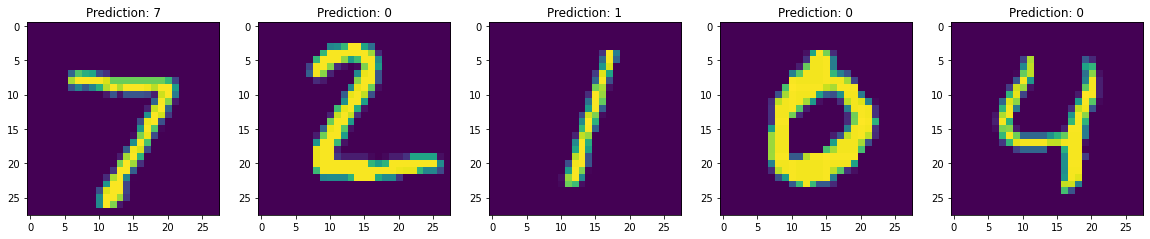

In [13]:
### GRADED
tf.random.set_seed(42)
test_images = X_test[:5]
preds = ''

    
# YOUR CODE HERE
#raise NotImplementedError()
reshaped_test_images = test_images.reshape(5, 28, 28, 1) #(num_observations, 28, 28, 1)
preds = np.argmax(conv_model.predict(reshaped_test_images), axis = 1)

### ANSWER CHECK
print(preds)
fig, ax = plt.subplots(1, 5, figsize = (20, 4))
for i, im in enumerate(test_images):
    ax[i].imshow(im.reshape(28, 28))
    ax[i].set_title(f'Prediction: {preds[i]}')